# World Happiness Report 2015 - 2019 Analysis

![image](https://ichef.bbci.co.uk/news/976/cpsprodpb/A204/production/_106067414_2.jpg)

The  **World Happiness Report**, published by the Earth Institute and co-edited by the institute’s director, Jeffrey Sachs, reflects a new worldwide demand for more attention to happiness and absence of misery as criteria for government policy. It reviews the state of happiness in the world today and shows how the new science of happiness explains personal and national variations in happiness.  It contains articles and rankings of national happiness, based on respondent ratings of their own lives, which the report also correlates with various (quality of) life factors.

The report being published since 2012 to our day, giving insights about the happiness ranks of different countries around the world. The data has five csv's which includes different years' happiness rankings. 

Data is collected from people in over 150 countries. Each variable measured reveals a populated-weighted average score on a scale running from 0 to 10 that is tracked over time and compared against other countries. These variables currently include:

- real GDP per capita
- social support
- healthy life expectancy
- freedom to make life choices
- generosity
- perceptions of corruption

In this notebook, we tried to answer;

- What makes people in a county happy?

- In which countries the happiness scores changed remarkably? 

- In total, from 2015 to 2019, how did the mean variables change?



# Importing Libraries

In [40]:
import os
import glob

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use('ggplot')

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Imputer
from sklearn.impute import KNNImputer

# Reading Dataset

# Data Wrangling

In [41]:
def read_data():
    all_data = {}
    for dirname, _, filenames in os.walk('world_happiness/'):
        for filename in filenames:
            path = os.path.join(dirname, filename)
            all_data[f'data_{path[-8:-4]}'] = pd.read_csv(path)
    
    all_data = {key: all_data[key] for key in sorted(all_data)}
    
    return all_data


all_data = read_data()
all_data.keys()


dict_keys(['data_2015', 'data_2016', 'data_2017', 'data_2018', 'data_2019'])

In [42]:
data2015 = all_data['data_2015']
data2016 = all_data['data_2016']
data2017 = all_data['data_2017']
data2018 = all_data['data_2018']
data2019 = all_data['data_2019']

In [43]:
# Let's investigate the data and see if they have any similar or different columns
print('Displaying 2015 data')
display(data2015.head())
print('\nDisplaying 2016 data', '-'*100)
display(data2016.head())

Displaying 2015 data


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176



Displaying 2016 data ----------------------------------------------------------------------------------------------------


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [44]:
print('Displaying 2017 data')
display(data2017.head())
print('\nDisplaying 2018 data', '-'*100)
display(data2018.head())

Displaying 2017 data


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182



Displaying 2018 data ----------------------------------------------------------------------------------------------------


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [45]:
print('Displaying 2019 data')
display(data2019.head())

Displaying 2019 data


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


So,

The 2015 and 2016 data columns are similar. (except standard deviation and CI. We have a formula for to find CI (for 2015 data) and STD from CI for (2016 data).
The formula : 
SD = sqrt(N) * (upper limit - lower limit) / 3.92 

    note = 3.92 is for data bigger than 100 samples

2018 and 2019 data columns are similar also. But they don't have STD and CI's. hmm let's think about that.  Maybe we can remove CI and STD

The first thing I would like to do is rename columns with easier names :) 

Country names can stay as they are. Region also can stay- I will concatenate df's on 2015 on Country column, we don't need to do sth.
Happiness Rank = Rank, Happiness Score = Score, Std error = remove, Economy (GDP per capita) = GDP, Health (Life expectancy) = Life expectancy and on. You'll see them in the following section. No need to comment them all. Let's start to rename.


## Filtering - Data 2015 

In [46]:
data2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [47]:
# Renaming columns of data 2015 
data2015 = data2015.rename(columns={'Happiness Rank': 'Rank',
                        'Happiness Score' : 'Score',
                        'Economy (GDP per Capita)' : 'GDP',
                        'Health (Life Expectancy)' : 'Life Expectancy',
                        'Trust (Government Corruption)': 'Trust'})

# Create a year column
data2015['Year'] = pd.to_datetime(2015, format='%Y').year

# Dropping std 
data2015 = data2015.drop(['Standard Error', 'Dystopia Residual'], axis=1)

# Adding '_2015' in all columns except country names and region
#keep_same = ['Country', 'Region']
#data2015 = data2015.rename(columns={col: col+'_2015' for col in data2015.columns if col not in keep_same})

## Filtering - Data 2016

In [48]:
data2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [49]:
# Renaming columns of data 2016
data2016 = data2016.rename(columns={'Happiness Rank': 'Rank',
                                    'Happiness Score' : 'Score',
                                    'Economy (GDP per Capita)' : 'GDP',
                                    'Health (Life Expectancy)' : 'Life Expectancy',
                                    'Trust (Government Corruption)': 'Trust'})

# Create a year column
data2016['Year'] = pd.to_datetime(2016, format='%Y').year

# Dropping CI
data2016 = data2016.drop(['Lower Confidence Interval','Upper Confidence Interval', 'Dystopia Residual', 'Region'], axis=1)

# Adding '_2016' in all columns except country names and region
#keep_same = ['Country', 'Region']
#data2016 = data2016.rename(columns={col: col+'_2016' for col in data2016.columns if col not in keep_same})

## Filtering - Data 2017

In [50]:
data2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [51]:
# Renaming columns of data 2017
data2017 = data2017.rename(columns={'Happiness.Rank': 'Rank',
                                    'Happiness.Score' : 'Score',
                                    'Economy..GDP.per.Capita.' : 'GDP',
                                    'Health..Life.Expectancy.' : 'Life Expectancy',
                                    'Trust..Government.Corruption.': 'Trust'})

#C reate a year column
data2017['Year'] = pd.to_datetime(2017, format='%Y').year

# Dropping CI
data2017 = data2017.drop(['Whisker.high','Whisker.low', 'Dystopia.Residual'], axis=1)

# Adding '_2017' in all columns except country names and region
#keep_same = ['Country']
#data2017 = data2017.rename(columns={col: col+'_2017' for col in data2017.columns if col not in keep_same})

## Filtering - Data 2018

In [52]:
data2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [53]:
# Renaming columns of data 2018
data2018 = data2018.rename(columns = {'Overall rank' : 'Rank',
                                     'Country or region' : 'Country',
                                     'GDP per capita' : 'GDP',
                                     'Social support' : 'Family',
                                     'Healthy life expectancy' : 'Life Expectancy',
                                     'Freedom to make life choices' : 'Freedom',
                                     'Perceptions of corruption': 'Trust'})

# Create a year column
data2018['Year'] = pd.to_datetime(2018, format='%Y').year

# Adding '_2018' in all columns except country names and region
#keep_same = ['Country']
#data2018 = data2018.rename(columns={col: col+'_2018' for col in data2018.columns if col not in keep_same})

## Filtering - Data 2019

In [54]:
data2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [55]:
# Renaming columns of data 2019
data2019 = data2019.rename(columns = {'Overall rank' : 'Rank',
                                     'Country or region' : 'Country',
                                     'GDP per capita' : 'GDP',
                                     'Social support' : 'Family',
                                     'Healthy life expectancy' : 'Life Expectancy',
                                     'Freedom to make life choices' : 'Freedom',
                                     'Perceptions of corruption': 'Trust'})

# Create a year column
data2019['Year'] = pd.to_datetime(2019, format='%Y').year

# Adding '_2018' in all columns except country names and region
#keep_same = ['Country']
#data2019 = data2019.rename(columns={col: col+'_2019' for col in data2019.columns if col not in keep_same})

In [56]:
print('Displaying 2015 data')
display(data2015.head())

print('\nDisplaying 2016 data', '-'*100)
display(data2016.head())

print('\nDisplaying 2017 data', '-'*100)
display(data2017.head())

print('\nDisplaying 2018 data', '-'*100)
display(data2018.head())

print('\nDisplaying 2019 data', '-'*100)
display(data2019.head())

Displaying 2015 data


,Country,Region,Rank,Score,GDP,Family,Life Expectancy,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015



Displaying 2016 data ----------------------------------------------------------------------------------------------------


,Country,Rank,Score,GDP,Family,Life Expectancy,Freedom,Trust,Generosity,Year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016



Displaying 2017 data ----------------------------------------------------------------------------------------------------


,Country,Rank,Score,GDP,Family,Life Expectancy,Freedom,Generosity,Trust,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017



Displaying 2018 data ----------------------------------------------------------------------------------------------------


,Rank,Country,Score,GDP,Family,Life Expectancy,Freedom,Generosity,Trust,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018



Displaying 2019 data ----------------------------------------------------------------------------------------------------


,Rank,Country,Score,GDP,Family,Life Expectancy,Freedom,Generosity,Trust,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


## Concatenating Dataset

In [57]:
# Merging all the dataset into one dataset
happiness= pd.concat([data2015, data2016, data2017, data2018, data2019], 
                     ignore_index=True)

In [58]:
happiness

,Country,Region,Rank,Score,GDP,Family,Life Expectancy,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,NaN,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,NaN,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,NaN,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,NaN,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


## In the Search of Missings

Let's see if the data has any missings.

Also see the descriptive table; all features has minimum scores == 0
We will replace 0's with np.NaN, and impute them with KNN. 

In [59]:
happiness.isna().sum()

Country              0
Region             624
Rank                 0
Score                0
GDP                  0
Family               0
Life Expectancy      0
Freedom              0
Trust                1
Generosity           0
Year                 0
dtype: int64

In [60]:
# Forward fill missings in Region by grouping them by country
happiness['Region'] = happiness.groupby('Country')['Region'].fillna(method='ffill')

# KNNimputer for Trust missing

imputer = KNNImputer()
happiness.iloc[:,2:11] = imputer.fit_transform(happiness.iloc[:,2:11])

In [61]:
happiness.isna().sum()

Country             0
Region             25
Rank                0
Score               0
GDP                 0
Family              0
Life Expectancy     0
Freedom             0
Trust               0
Generosity          0
Year                0
dtype: int64

There are still 25 Regions which have NA value. We will use the following dictionary to fill remaining NA values.

In [62]:
map = {'Belize': 'Latin America and Caribbean', 'Gambia': 'Sub-Saharan Africa', 
       'Hong Kong S.A.R., China': 'Eastern Asia', 'Namibia': 'Sub-Saharan Africa', 
       'North Macedonia': 'Central and Eastern Europe', 'Northern Cyprus': 'Middle East and Northern Africa', 
       'Puerto Rico': 'Latin America and Caribbean', 'Somalia': 'Sub-Saharan Africa', 
       'Somaliland Region': 'Sub-Saharan Africa', 'South Sudan': 'Sub-Saharan Africa', 
       'Taiwan Province of China': 'Southeastern Asia', 'Trinidad & Tobago': 'Latin America and Caribbean'}

for index, row in happiness.iterrows():
  if happiness.loc[index, 'Country'] in map:
    new_value = map[happiness.loc[index, 'Country']]
    happiness.loc[index, 'Region'] = new_value

In [63]:
happiness.isna().sum()

Country            0
Region             0
Rank               0
Score              0
GDP                0
Family             0
Life Expectancy    0
Freedom            0
Trust              0
Generosity         0
Year               0
dtype: int64

Now see zeros in the data.

In [64]:
happiness[happiness['GDP']==0]

,Country,Region,Rank,Score,GDP,Family,Life Expectancy,Freedom,Trust,Generosity,Year
119,Congo (Kinshasa),Sub-Saharan Africa,120.0,4.517,0.0,1.00120,0.098060,0.226050,0.076250,0.248340,2015.0
233,Somalia,Sub-Saharan Africa,76.0,5.440,0.0,0.33613,0.114660,0.567780,0.311800,0.272250,2016.0
469,Central African Republic,Sub-Saharan Africa,155.0,2.693,0.0,0.00000,0.018773,0.270842,0.056565,0.280876,2017.0
567,Somalia,Sub-Saharan Africa,98.0,4.982,0.0,0.71200,0.115000,0.674000,0.282000,0.238000,2018.0
737,Somalia,Sub-Saharan Africa,112.0,4.668,0.0,0.69800,0.268000,0.559000,0.270000,0.243000,2019.0


In [65]:
happiness[happiness['Trust']==0]

,Country,Region,Rank,Score,GDP,Family,Life Expectancy,Freedom,Trust,Generosity,Year
73,Indonesia,Southeastern Asia,74.0,5.399,0.828270,1.087080,0.637930,0.466110,0.0,0.515350,2015.0
244,Bosnia and Herzegovina,Central and Eastern Europe,87.0,5.163,0.933830,0.643670,0.707660,0.095110,0.0,0.298890,2016.0
404,Bosnia and Herzegovina,Central and Eastern Europe,90.0,5.182,0.982409,1.069336,0.705186,0.204403,0.0,0.328867,2017.0
536,Moldova,Central and Eastern Europe,67.0,5.640,0.657000,1.301000,0.620000,0.232000,0.0,0.171000,2018.0
562,Bosnia and Herzegovina,Central and Eastern Europe,93.0,5.129,0.915000,1.078000,0.758000,0.280000,0.0,0.216000,2018.0
696,Moldova,Central and Eastern Europe,71.0,5.529,0.685000,1.328000,0.739000,0.245000,0.0,0.181000,2019.0


In [66]:
happiness[happiness['Family']==0]

,Country,Region,Rank,Score,GDP,Family,Life Expectancy,Freedom,Trust,Generosity,Year
147,Central African Republic,Sub-Saharan Africa,148.0,3.678,0.07850,0.0,0.066990,0.488790,0.082890,0.238350,2015.0
312,Togo,Sub-Saharan Africa,155.0,3.303,0.28123,0.0,0.248110,0.346780,0.115870,0.175170,2016.0
469,Central African Republic,Sub-Saharan Africa,155.0,2.693,0.00000,0.0,0.018773,0.270842,0.056565,0.280876,2017.0
624,Central African Republic,Sub-Saharan Africa,155.0,3.083,0.02400,0.0,0.010000,0.305000,0.038000,0.218000,2018.0
780,Central African Republic,Sub-Saharan Africa,155.0,3.083,0.02600,0.0,0.105000,0.225000,0.035000,0.235000,2019.0


In [67]:
happiness[happiness['Freedom']==0]

,Country,Region,Rank,Score,GDP,Family,Life Expectancy,Freedom,Trust,Generosity,Year
111,Iraq,Middle East and Northern Africa,112.0,4.677,0.985490,0.818890,0.602370,0.0,0.13788,0.179220,2015.0
290,Sudan,Sub-Saharan Africa,133.0,4.139,0.630690,0.819280,0.297590,0.0,0.10039,0.180770,2016.0
454,Angola,Sub-Saharan Africa,140.0,3.795,0.858428,1.104412,0.049869,0.0,0.06972,0.097926,2017.0
611,Angola,Sub-Saharan Africa,142.0,3.795,0.730000,1.125000,0.269000,0.0,0.06100,0.079000,2018.0
779,Afghanistan,Southern Asia,154.0,3.203,0.350000,0.517000,0.361000,0.0,0.02500,0.158000,2019.0


In [68]:
happiness[happiness['Generosity']==0]

,Country,Region,Rank,Score,GDP,Family,Life Expectancy,Freedom,Trust,Generosity,Year
101,Greece,Western Europe,102.0,4.857,1.154060,0.929330,0.882130,0.076990,0.01397,0.0,2015.0
256,Greece,Western Europe,99.0,5.033,1.248860,0.754730,0.800290,0.058220,0.04127,0.0,2016.0
401,Greece,Western Europe,87.0,5.227,1.289487,1.239415,0.810199,0.095731,0.04329,0.0,2017.0
548,Greece,Western Europe,79.0,5.358,1.154000,1.202000,0.879000,0.131000,0.04400,0.0,2018.0
707,Greece,Western Europe,82.0,5.287,1.181000,1.156000,0.999000,0.067000,0.03400,0.0,2019.0


As you can see we have zeros; lets change them to NaN's.

In [69]:
# Replacing 0's with nans
happiness = happiness.replace(0, np.nan)
happiness.isna().sum()

Country            0
Region             0
Rank               0
Score              0
GDP                5
Family             5
Life Expectancy    5
Freedom            5
Trust              6
Generosity         5
Year               0
dtype: int64

In [70]:
# Impute missings groupedby Year,
happiness.iloc[:,2:10] = imputer.fit_transform(happiness.iloc[:,2:10])
happiness.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,782.0,78.698210,45.182384,1.000000,40.000000,79.000000,118.000000,158.000000
Score,782.0,5.379018,1.127456,2.693000,4.509750,5.322000,6.189500,7.769000
GDP,782.0,0.920363,0.401827,0.015300,0.619250,0.982705,1.236187,2.096000
Family,782.0,1.081865,0.320979,0.104190,0.869363,1.124735,1.327250,1.644000
Life Expectancy,782.0,0.614830,0.244287,0.005565,0.440663,0.647310,0.808000,1.141000
Freedom,782.0,0.413429,0.149374,0.005890,0.312000,0.431000,0.531000,0.724000
Trust,782.0,0.126160,0.105237,0.001000,0.055067,0.091895,0.155861,0.551910
Generosity,782.0,0.219869,0.121138,0.001990,0.134000,0.202000,0.279705,0.838075
Year,782.0,2016.993606,1.417364,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000


We believe, it is better now. 

# Analysing Dataset Functions

In [71]:
def get_heatmap(data: pd.DataFrame, year: str):  
  fig, ax = plt.subplots(figsize=(11, 8)) 
  sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=3, cmap='coolwarm',
              ax=ax, annot_kws={'size': 12, 'color':'black'})
  ax.set_title('Data - ' + year, fontsize=15, fontweight='bold', pad=5)
  plt.xticks(rotation=45, weight='bold')
  plt.yticks(weight='bold')
  plt.show()

In [72]:
def get_vif(dataframe: pd.DataFrame) -> pd.DataFrame:
  """
  This function calculated VIF of the given dataframe, 
  returns Variance Inflation Factor as a dataframe.
  """
  dataframe = dataframe._get_numeric_data()
  vif_df = pd.DataFrame()
  vif_df['columns'] = dataframe.columns
  vif_df['VIF Value'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
  return(vif_df)

In [73]:
def subplot_score(data: pd.DataFrame, year: str):
  fig, ax = plt.subplots(2, 3, figsize=(18, 8))

  plot_columns = ['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity']
  plot_color = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']

  for i in range(6):
    m = i // 3
    n = i % 3

    ax[m, n].scatter('Score', plot_columns[i], data=data, color=plot_color[i],
                marker='o')
    ax[m, n].set_xlabel('Score', fontweight='bold') 
    ax[m, n].set_ylabel(plot_columns[i], fontweight='bold')

  fig.suptitle('Score variable in data ' + year, fontsize=16)
  plt.show()

In [74]:
def get_seaborn_bar(data: pd.DataFrame, y: str, plot_title: str, 
                    plot_color:str = 'Paired', title_color: str = 'black'):
  fig, ax = plt.subplots(1, 1, figsize=(15, 7))
  
  plot = sns.barplot(ax=ax, x=data['Country'], y=data[y],
                     palette=sns.color_palette(plot_color, data.shape[0]))

  for index, row in data.iterrows():
    plot.text(x=index, y=row[y]*1.01, s=round(row['Score'], 2), 
              ha='center', color='black')

  ax.set_title(plot_title, fontdict={'fontweight':'bold', 'color':title_color})
  ax.set_xticklabels(textwrap.fill(x.get_text(), 7, subsequent_indent='-') for x in ax.get_xticklabels())
  ax.set_xlabel('Country', fontweight='bold')
  ax.set_ylabel(y, fontweight='bold')
  return ax

# Analysis of Data - 2015


In [75]:
# We imputed 0's, so time to edit the data: 2015
data2015 = happiness[happiness['Year']==2015]

In [76]:
# Checking data types of all the columns
data2015.dtypes

Country             object
Region              object
Rank               float64
Score              float64
GDP                float64
Family             float64
Life Expectancy    float64
Freedom            float64
Trust              float64
Generosity         float64
Year               float64
dtype: object

In [77]:
data2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
GDP,158.0,0.850105,0.397789,0.01530,0.557532,0.910245,1.158448,1.69042
Family,158.0,0.995408,0.261706,0.13995,0.856823,1.029510,1.214405,1.40223
Life Expectancy,158.0,0.632529,0.242862,0.04776,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.431084,0.146770,0.07699,0.329603,0.435515,0.549092,0.66973
Trust,158.0,0.143999,0.119558,0.00227,0.062550,0.107220,0.180255,0.55191
Generosity,158.0,0.238473,0.125323,0.00199,0.154913,0.216130,0.309883,0.79588
Year,158.0,2015.000000,0.000000,2015.00000,2015.000000,2015.000000,2015.000000,2015.00000


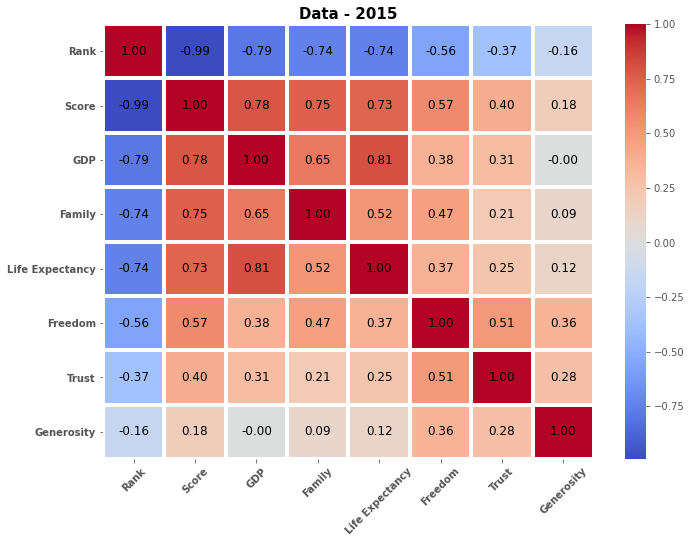

In [78]:
get_heatmap(data=data2015.drop('Year', axis=1), year='2015')

In [79]:
get_vif(data2015.drop(['Rank','Score', 'Year'], axis=1))

,columns,VIF Value
0,GDP,20.994263
1,Family,20.555278
2,Life Expectancy,22.301119
3,Freedom,16.950813
4,Trust,3.580387
5,Generosity,5.548935


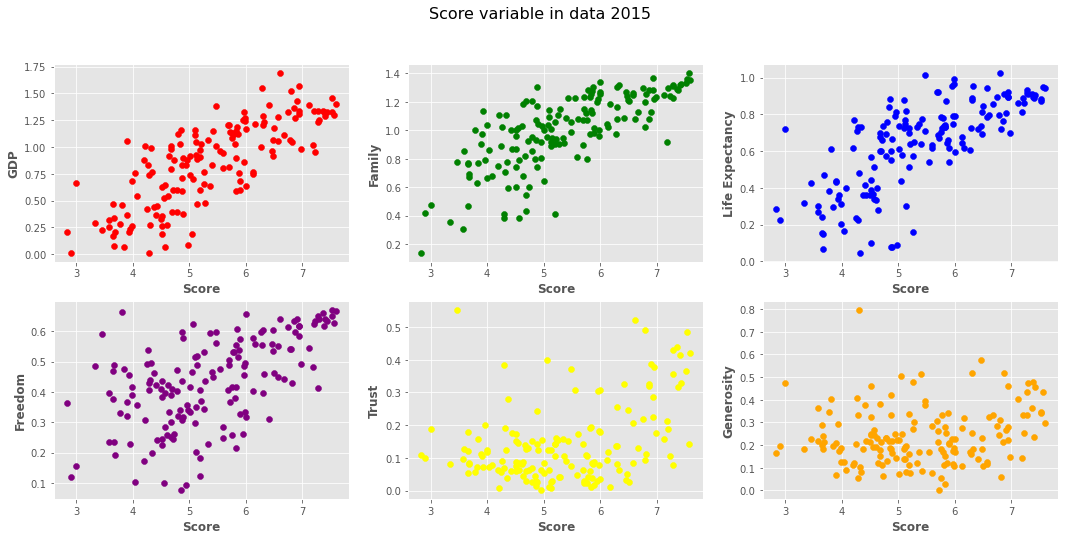

In [80]:
subplot_score(data=data2015, year='2015')

The scatterplots show us GDP, Family Support, Life Expectancy, and Freedom are highly correlated with Happiness scores of the countries. 

Further more, We see that Trust follows a trend in happy countries. We would like to analyze that.

In [81]:
# Dividing dataset 2015 on the basis on score
unhappy_2015 = data2015[data2015['Score'] < 5]
happy_2015 = data2015[data2015['Score'] >= 5]

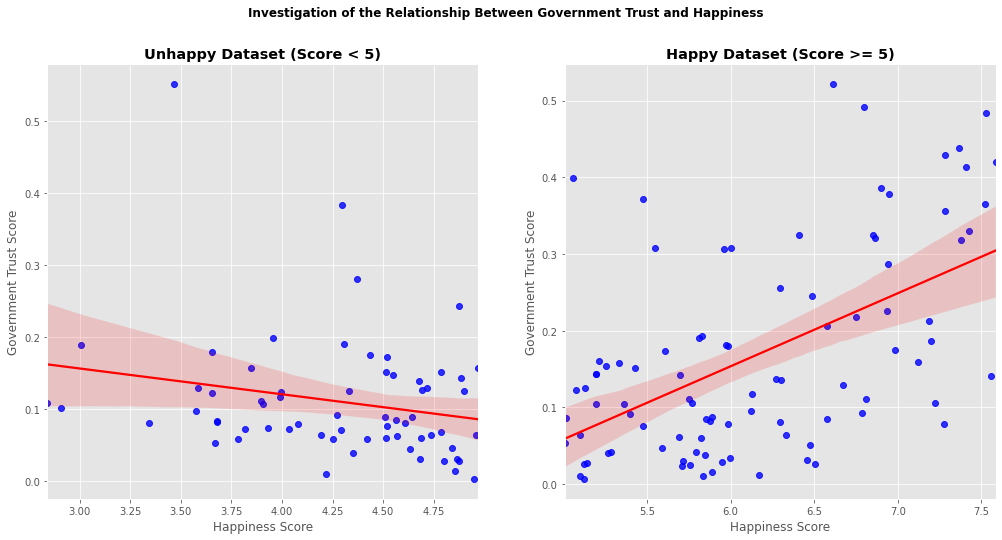

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(17, 8))

plot_1 = sns.regplot(x='Score', y='Trust', data=unhappy_2015, 
                     ax=ax[0], line_kws={"color": "red"}, 
                     scatter_kws={"color": "blue"})
ax[0].set_title('Unhappy Dataset (Score < 5)', fontweight='bold')
ax[0].set_xlabel('Happiness Score') 
ax[0].set_ylabel('Government Trust Score')

plot_2 = sns.regplot(x='Score', y= 'Trust', data= happy_2015, 
                     ax=ax[1], line_kws={"color": "red"},
                     scatter_kws={"color": "blue"})
ax[1].set_title('Happy Dataset (Score >= 5)', fontweight='bold')
ax[1].set_xlabel('Happiness Score') 
ax[1].set_ylabel('Government Trust Score')

fig.suptitle('Investigation of the Relationship Between Government Trust and Happiness', fontweight='bold')
plt.show()

As we thought, We found a good relationship between Happiness and Government Trust in happy countries. As you can see from the regplot, if we narrow the happiness score from 6.0 maybe we can find a better regression line.

Let's do the same for generosity

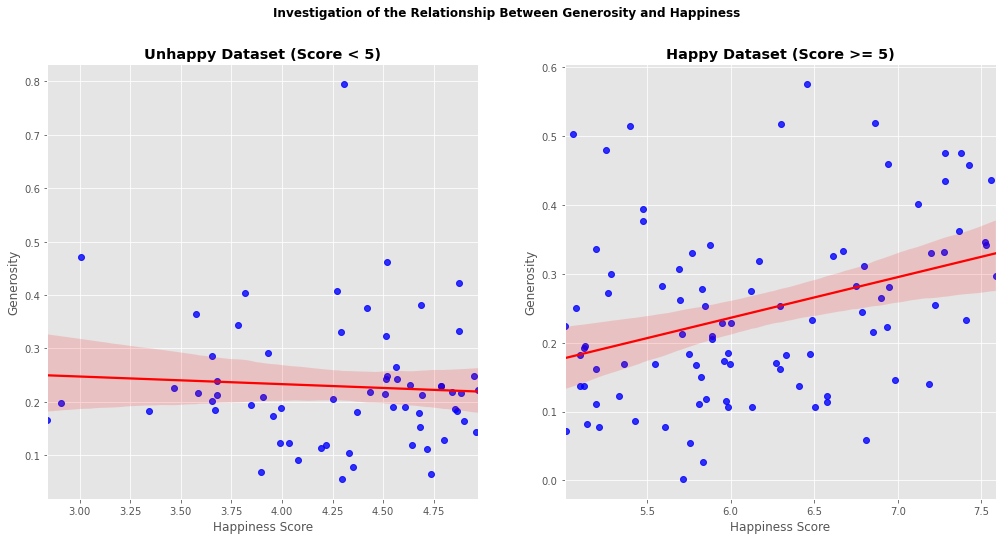

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(17, 8))

plot_1 = sns.regplot(x='Score', y='Generosity', data=unhappy_2015, 
                     ax=ax[0], line_kws={"color": "red"}, 
                     scatter_kws={"color": "blue"})
ax[0].set_title('Unhappy Dataset (Score < 5)', fontweight='bold')
ax[0].set_xlabel('Happiness Score') 
ax[0].set_ylabel('Generosity')

plot_2 = sns.regplot(x='Score', y= 'Generosity', data= happy_2015, 
                     ax=ax[1], line_kws={"color": "red"},
                     scatter_kws={"color": "blue"})
ax[1].set_title('Happy Dataset (Score >= 5)', fontweight='bold')
ax[1].set_xlabel('Happiness Score') 
ax[1].set_ylabel('Generosity')

fig.suptitle('Investigation of the Relationship Between Generosity and Happiness', fontweight='bold')
plt.show()

It is nearly the same with Trust. People living in happy countries trusting their governments more than un_happy countries. However, this may be vise versa;
If you trust your governemnt, and with GDP you have, you are generous you are happier.

## Region Wise Happiness Score in 2015

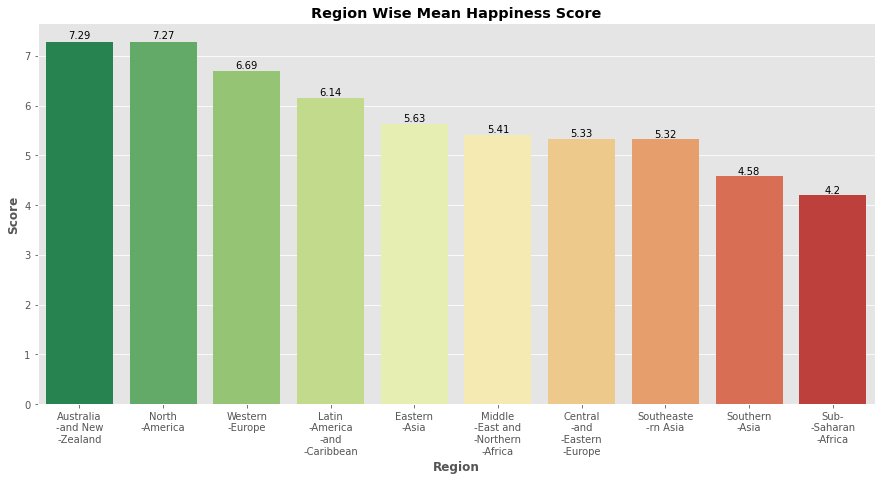

In [84]:
region_mean = data2015.groupby('Region')['Score'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plot = sns.barplot(x=region_mean.index, y=region_mean, ax=ax, palette=sns.color_palette("RdYlGn_r", len(region_mean)))
i = 0
for index, row in region_mean.iteritems():
  plot.text(x=i, y=row*1.01, s=round(row, 2), 
            ha='center', color='black')
  i += 1

ax.set_title('Region Wise Mean Happiness Score', fontdict={'fontweight':'bold'})
ax.set_xlabel('Region', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_xticklabels(textwrap.fill(x.get_text(), 10, subsequent_indent='-') for x in ax.get_xticklabels())
plt.show()

As per the above barplot, Australia, New Zealand and North America have the highest happiness score while Sub Saharan Africa has lowest happiness score in 2015. 

## Who is the Happiest and least Happy in the World in 2015

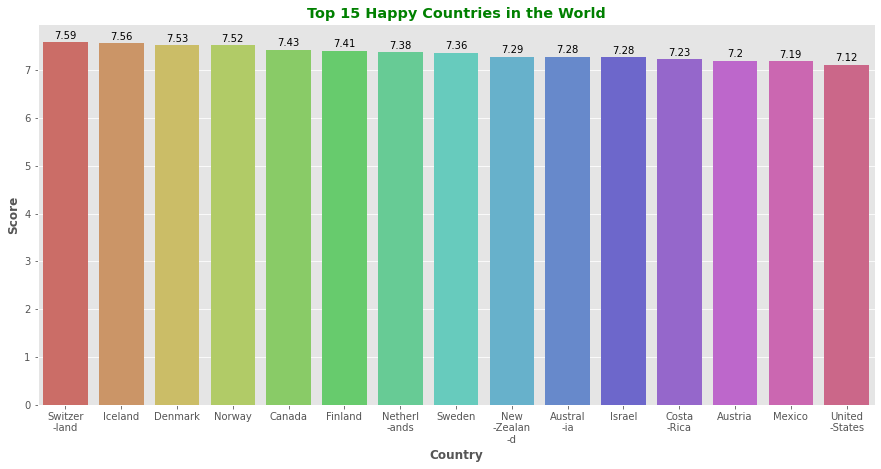

In [85]:
# Visualization of the top 15 happy countries in 2015
top_happy_countries = data2015.sort_values('Score', ascending= False).head(n=15)
ax = get_seaborn_bar(data=top_happy_countries, y='Score', 
                     plot_title='Top 15 Happy Countries in the World', 
                     plot_color='hls', title_color='green')
plt.show()

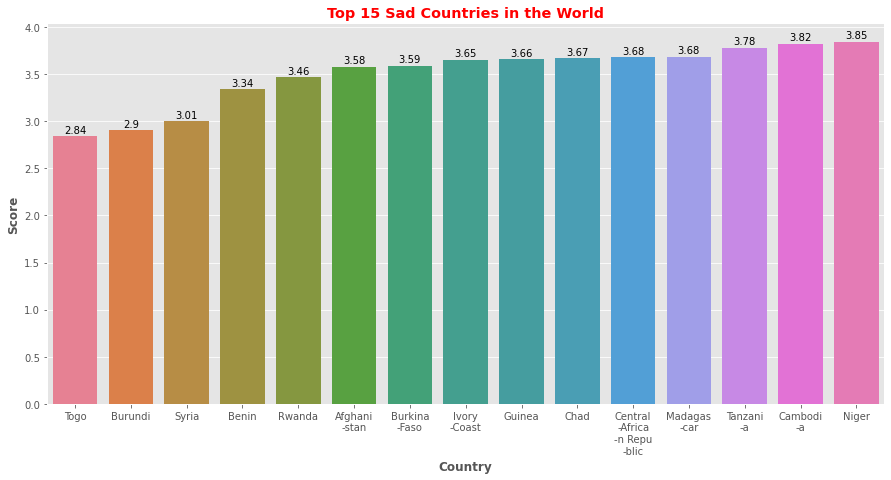

In [86]:
# Visualiation of the top 15 sad countries in 2015
top_sad_countries = data2015.sort_values('Score', 
                                         ascending= False).tail(n=15)[::-1].reset_index(drop=True)
ax = get_seaborn_bar(data=top_sad_countries, 
                     y='Score', 
                     plot_title='Top 15 Sad Countries in the World', 
                     plot_color='husl', title_color='red')
plt.show()

Nordic countries, Canada, New Zeland and Australia are the happiest countries in the world. On the other hand, African and Easian countries which suffer a lot from poverty or wars (Syria) are the unhappiest countries of all.

## Can Money Buy Happiness?

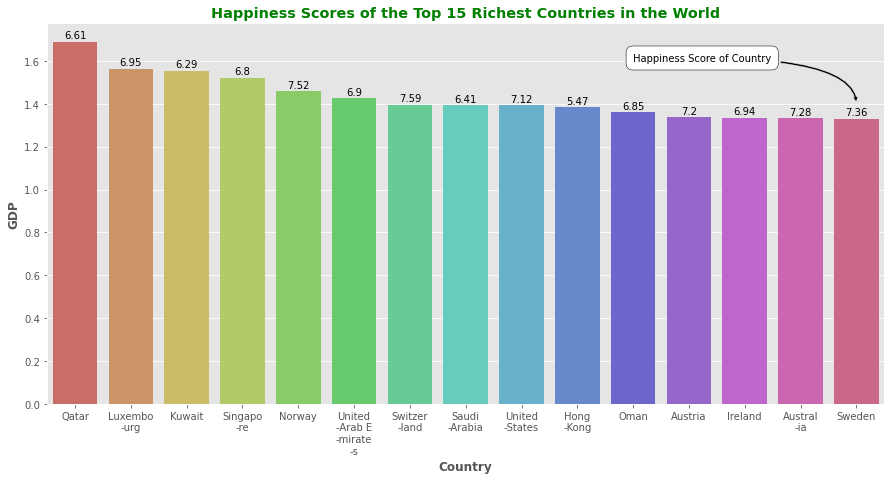

In [87]:
# Visualization of the top 15 rich countries in 2015
richests = data2015.sort_values('GDP',ascending=False).head(n=15).reset_index(drop=True)
ax = get_seaborn_bar(data=richests, y='GDP', plot_title='Happiness Scores of the Top 15 Richest Countries in the World', 
                     plot_color='hls', title_color='green')
ax.annotate('Happiness Score of Country', xy=(14, 1.4), xytext=(10, 1.6),
            arrowprops=dict(arrowstyle='simple',
                            facecolor='black', 
                            connectionstyle='angle3,angleA=0,angleB=90'), 
                            bbox=dict(boxstyle='round, pad=0.7', 
                                      facecolor='w', edgecolor='black'))
plt.show()

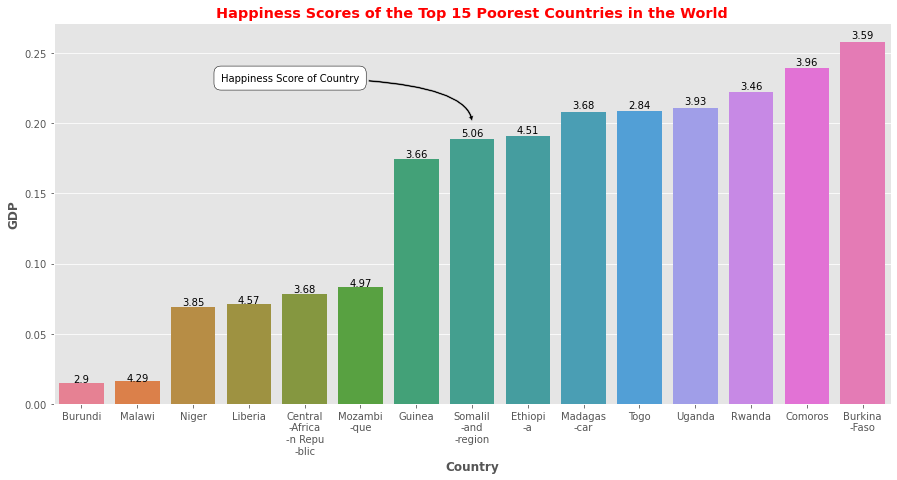

In [88]:
# Visualization of the top 15 poor countries in 2015
poorests = data2015.sort_values('GDP',ascending=True).head(n=15).reset_index(drop=True).reset_index(drop=True)
ax = get_seaborn_bar(data=poorests, y='GDP', plot_title='Happiness Scores of the Top 15 Poorest Countries in the World', 
                     plot_color='husl', title_color='red')
ax.annotate('Happiness Score of Country', xy=(7, 0.2), xytext=(2.5, 0.23),
            arrowprops=dict(arrowstyle='simple',
                            facecolor='black', 
                            connectionstyle='angle3,angleA=0,angleB=90'), 
                            bbox=dict(boxstyle='round, pad=0.7', 
                                      facecolor="w", edgecolor='black'))
plt.show()

Money buys happiness, globally :)

Let's investigate both bar charts. We know this is an extra job, because Scatter plots gave us the relations between Score and GPD.

For the richest, we see they have a happiness score of minimum 5.47 but as you can see this is an outlier.  The next country has a score of 6.29. While the happiest country has a score of 7.49 we can say money can bring you a good amount of happiness. But it is obvious that you can't rely your happiness on money only.

For the unwealthy countries, some interesting outcomes we have here: 

Congo - Kinshasa, has a happiness score of 4.52 and Malawi, the 3rd, has 4.29. The happiest among the unwealthy countries is Somali with a score of 5.06. This bar chart supports our discussion that money effects happiness but you cannot rely everything on money. But keep it in mind that money has a good effect on happiness.


# Analysis of Data - Remaining Years (2016 - 2019)

We have analysed data 2015 and found some interesting patterns and relation between features. Now, we will analyse the data of 2016-2019 years with plotly library.

First we will see heatmaps and then top happy, sad, rich and poor countries in each year.

In [89]:
# Assign new data
data2016 = happiness[happiness['Year'] == 2016]
data2017 = happiness[happiness['Year'] == 2017]
data2018 = happiness[happiness['Year'] == 2018]
data2019 = happiness[happiness['Year'] == 2019]

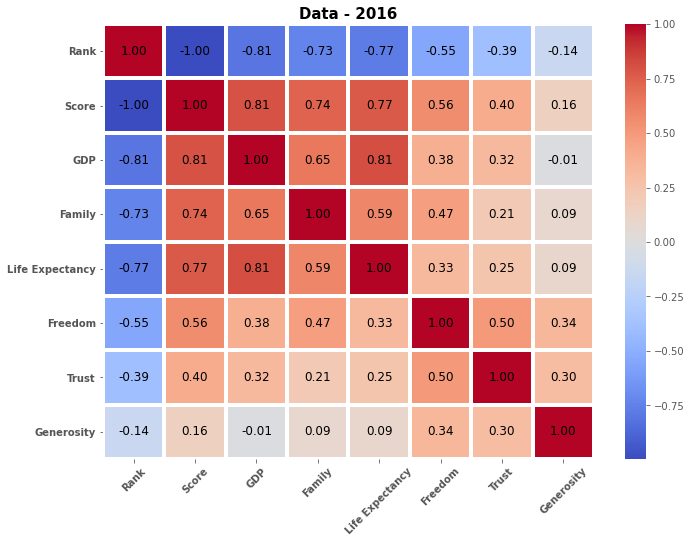

In [90]:
get_heatmap(data2016.drop('Year', axis=1), '2016')

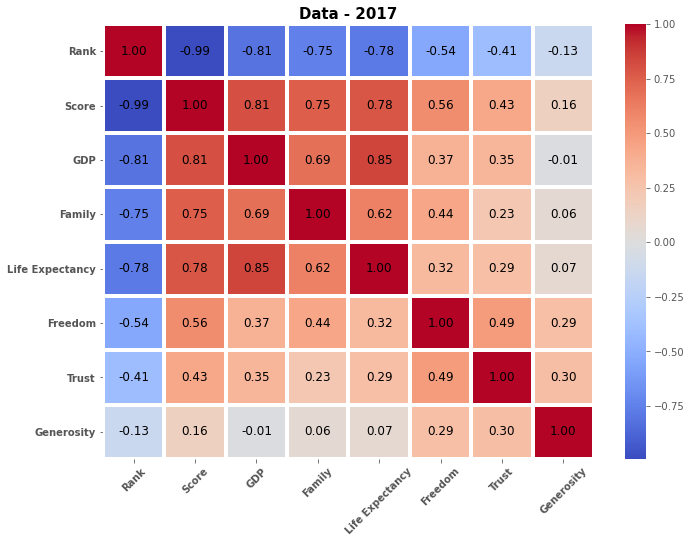

In [91]:
get_heatmap(data2017.drop('Year', axis=1), '2017')

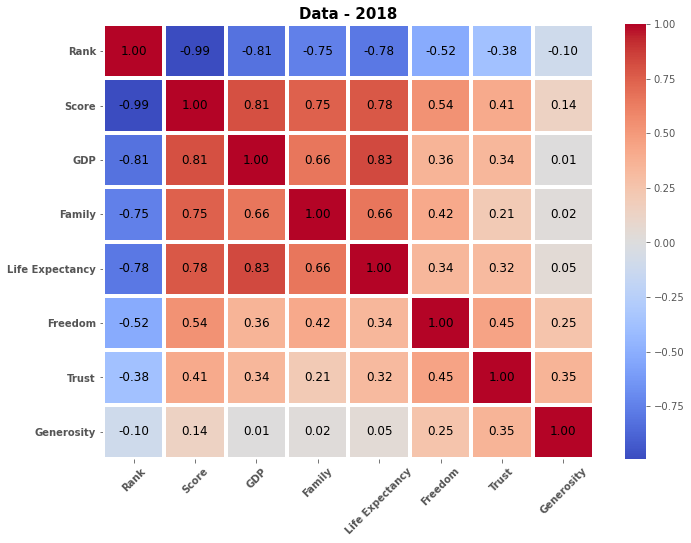

In [92]:
get_heatmap(data2018.drop('Year',axis=1), '2018')

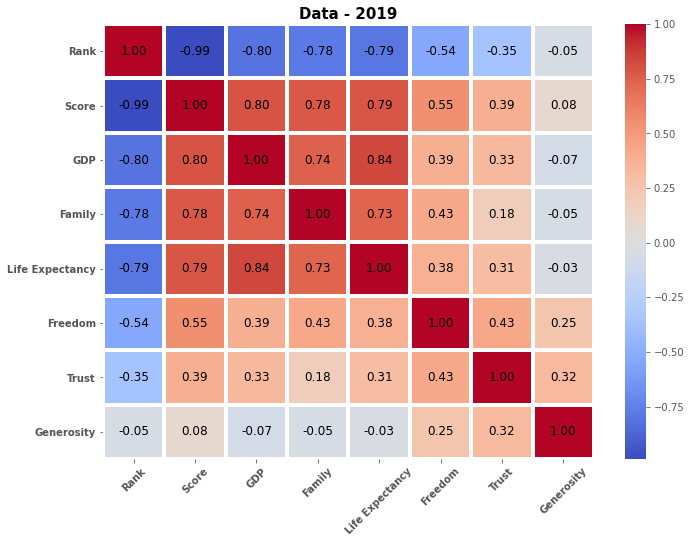

In [93]:
get_heatmap(data2019.drop('Year', axis=1), '2019')

As expected. For all years happiness relies on GDP , family and life expectancy. However, as you can see GDP and Life expectancy has a high correlation and high variance inflation factor score. We might not be sure about which one effects happiness the most. 

Now let's plot happiest and unhappiest countries:

In [113]:
px.scatter(data_frame = happiness,
           x = 'GDP', 
           y = 'Score', 
           animation_frame = 'Year',
           animation_group = 'Country',
           size = 'Score', 
           color = 'Country', 
           hover_name = 'Rank',
           height = 600, 
           title = 'Happiness Scores vs GDP')

In [114]:
px.scatter(data_frame = happiness,
           x = 'Family', 
           y = 'Score', 
           animation_frame = 'Year',
           animation_group = 'Country',
           size = 'Score', 
           color = 'Country', 
           hover_name = 'Rank',
           height = 750,
           title = 'Happiness Scores vs Family Support')

In [95]:
# Creating data frames to plot top happy countries over the years
top_happy_countries_2015 = data2015.sort_values('Score', 
                                                ascending=False).head(n=15)

top_happy_countries_2016 = data2016.sort_values('Score', 
                                                ascending=False).head(n=15)

top_happy_countries_2017 = data2017.sort_values('Score', 
                                                ascending=False).head(n=15)

top_happy_countries_2018 = data2018.sort_values('Score', 
                                                ascending=False).head(n=15)

top_happy_countries_2019 = data2019.sort_values('Score', 
                                                ascending=False).head(n=15)

all_happy_countries = pd.concat([top_happy_countries_2015, 
                                 top_happy_countries_2016,
                                 top_happy_countries_2017, 
                                 top_happy_countries_2018,
                                 top_happy_countries_2019], ignore_index=True)

# Visualization of the top happy countries
px.bar(data_frame = all_happy_countries,
       x = 'Country', 
       y = 'Score', 
       animation_frame = 'Year', 
       color = 'GDP',
       title = 'Top 15 Happy Countries and Their GDP per year')

Over the years, Denmark always occupied one of the top 3 positions for happiest countries. Switzerland came down one position every year. Finland occupied 5th position in 2016 and 2017 year but jumped to 1st position for both 2018 and 2019 year which is a significant improvement. Also, Luxembourg was not in the top 15 for 2016-2018 year but in 2019 it came in the top 15 happiest countries. 


In [96]:
# Creating data frames to plot top sad countries over the years
top_sad_countries_2015 = data2015.sort_values('Score', 
                                         ascending=False).tail(n=15)[::-1].reset_index(drop=True)

top_sad_countries_2016 = data2016.sort_values('Score', 
                                         ascending=False).tail(n=15)[::-1].reset_index(drop=True)

top_sad_countries_2017 = data2017.sort_values('Score', 
                                         ascending=False).tail(n=15)[::-1].reset_index(drop=True)

top_sad_countries_2018 = data2018.sort_values('Score', 
                                         ascending=False).tail(n=15)[::-1].reset_index(drop=True)

top_sad_countries_2019 = data2019.sort_values('Score', 
                                         ascending=False).tail(n=15)[::-1].reset_index(drop=True)

all_sad_countries = pd.concat([top_sad_countries_2015,top_sad_countries_2016,
                      top_sad_countries_2017, top_sad_countries_2018,
                      top_sad_countries_2019], ignore_index=True)

# Visualization of the top sad countries
px.bar(data_frame = all_sad_countries, 
       x = 'Country', 
       y = 'Score', 
       animation_frame = 'Year', 
       color = 'GDP', 
       title = 'Top 15 Sad Countries and Their GDP per year')

Burundi for the time period 2016-2018 was either last or second last in least happiest countries but in 2019 it jumped to 12th position from last which is noteworthy advancement. 

Syria, made it to a slightly higher place. But as you can see, its GPD decreased over time.

Afghanistan had many ups and downs. In 2016, it was at 4th last position and then jumped to 15th last position in the next year only. Since then, Afghanistan is coming down and further down which is very dreadful. 

Uganda, Burkina Faso and Chad did appear in 2016 barplot but then vanished from 2017-2019 barplot which is a remarkable boost. Berlin, Togo and Guinea did pop up in bar plots of 2016 and 2017 but they faded away in bar plots of 2018 and 2019 which is again incredible.

In [97]:
# Creating data frames to plot top rich countries over the years
richests_2015 = data2015.sort_values('GDP',
                                     ascending=False).head(n=15).reset_index(drop=True)

richests_2016 = data2016.sort_values('GDP',
                                     ascending=False).head(n=15).reset_index(drop=True)

richests_2017 = data2017.sort_values('GDP',
                                     ascending=False).head(n=15).reset_index(drop=True)

richests_2018 = data2018.sort_values('GDP',
                                     ascending=False).head(n=15).reset_index(drop=True)

richests_2019 = data2019.sort_values('GDP',
                                     ascending=False).head(n=15).reset_index(drop=True)

all_rich_countries = pd.concat([richests_2015, richests_2016, richests_2017,
                      richests_2018, richests_2019], ignore_index=True)

# Visualization of the top rich countries
px.bar(data_frame = all_rich_countries, 
       x = 'Country', 
       y = 'Score', 
       animation_frame = 'Year',
       color = 'Score', 
       title = 'Happiness Scores of the Richest Countries')

Among the rich countries, only Honk Kong seems to be slighlt unhappy. This finding may require extra investigation.  Apart from Hong Kong, Northern America, Arabic Oil Rich countries, and Northern European countries are in the top 15 for all years. Bahrain showed itself on the list in 2017 and then dissepeared after.

Also we observe, rich countries have a happiness score at least 6.00.

In [98]:
# Creating data frames to plot top poor countries over the years
poorests_2016 = data2016.sort_values('GDP',
                                      ascending=True).head(n=15).reset_index(drop=True)

poorests_2015 = data2015.sort_values('GDP',
                                      ascending=True).head(n=15).reset_index(drop=True)

poorests_2017 = data2017.sort_values('GDP',
                                      ascending=True).head(n=15).reset_index(drop=True)

poorests_2018 = data2018.sort_values('GDP',
                                      ascending=True).head(n=15).reset_index(drop=True)

poorests_2019 = data2019.sort_values('GDP',
                                      ascending=True).head(n=15).reset_index(drop=True)

all_poor_countries = pd.concat([poorests_2015,poorests_2016, poorests_2017,
                       poorests_2018, poorests_2019], ignore_index=True)

# Visualization of the top rich countries
px.bar(data_frame = all_poor_countries, 
       x = 'Country', 
       y = 'Score', 
       animation_frame = 'Year',
       color = 'Score', 
       title = 'Happiness Scores of Poorest Countries')

As in the rich countries, we have countries that can be accepted as semi-happy which are poor (Somaliland Region for instance). And again, as in the rich countries, these values seem to be outliers. Generally speaking, the countries with a low GPD have a happiness score in range 2.8 to 4.5.

# Changes Over Time

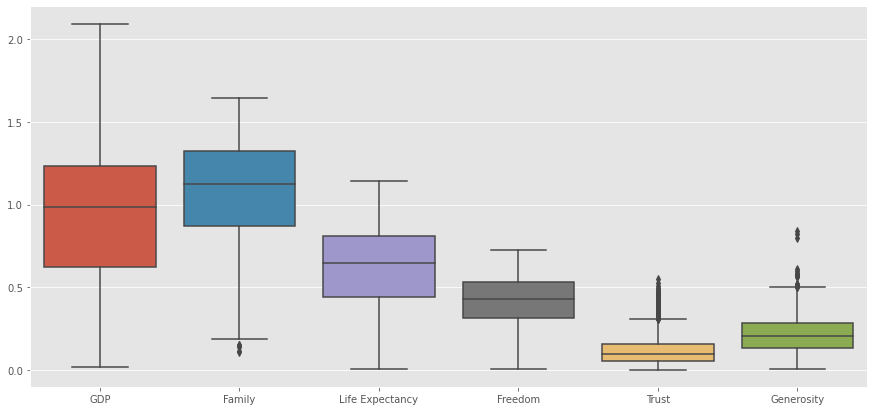

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.boxplot(data = happiness.drop(['Rank', 'Year', 'Score'], axis=1), ax=ax)
plt.show()

In [100]:
from scipy.stats import zscore
z = np.abs(zscore(happiness._get_numeric_data(), axis=0, ddof=0, nan_policy='omit'))
happiness._get_numeric_data()[(z<3).all(axis=1)]

,Rank,Score,GDP,Family,Life Expectancy,Freedom,Trust,Generosity,Year
0,1.0,7.587,1.39651,1.349510,0.94143,0.665570,0.41978,0.29678,2015.0
1,2.0,7.561,1.30232,1.402230,0.94784,0.628770,0.14145,0.43630,2015.0
3,4.0,7.522,1.45900,1.330950,0.88521,0.669730,0.36503,0.34699,2015.0
4,5.0,7.427,1.32629,1.322610,0.90563,0.632970,0.32957,0.45811,2015.0
5,6.0,7.406,1.29025,1.318260,0.88911,0.641690,0.41372,0.23351,2015.0
...,...,...,...,...,...,...,...,...,...
777,152.0,3.334,0.35900,0.711000,0.61400,0.555000,0.41100,0.21700,2019.0
778,153.0,3.231,0.47600,0.885000,0.49900,0.417000,0.14700,0.27600,2019.0
779,154.0,3.203,0.35000,0.517000,0.36100,0.282542,0.02500,0.15800,2019.0
780,155.0,3.083,0.02600,0.558731,0.10500,0.225000,0.03500,0.23500,2019.0


In [101]:
no_outliers = happiness._get_numeric_data()[(z<3).all(axis=1)]
no_outliers['Year'].value_counts()

2019.0    155
2015.0    153
2018.0    153
2017.0    151
2016.0    149
Name: Year, dtype: int64

## World Maps for Happiness Scores

In [111]:
# World map for happiness score over the years
fig = px.choropleth(data_frame = happiness, 
                    locations = 'Country',
                    locationmode = 'country names',
                    animation_frame ='Year',
                    color = 'Score',
                    hover_name = 'Country',
                    color_continuous_scale = px.colors.sequential.Plasma)
fig.show()

In [103]:
# World map for GDP in over the years
fig = px.choropleth(happiness, 
                    locations = 'Country',
                    locationmode = 'country names',
                    animation_frame = 'Year',
                    color = 'GDP',
                    hover_name = 'Country',
                    color_continuous_scale = px.colors.sequential.Plasma)
fig.show()

## Score change over the years

Now I want to investigate the changes to happiness scores by years. I will only extract 2015 happiness score from 2019 happiness, and investigate countries which are drastically decreased, if there are any.


In [104]:
columns = ['Country', 'Score', 'Year']
happiness_scores = happiness.loc[:, columns]
happies = happiness_scores[happiness_scores['Score'] >= 5]
sads = happiness_scores[happiness_scores['Score'] < 5]

In [105]:
score_diiference = happiness_scores.groupby('Country')['Score'].agg(['first','last'])
score_diiference['difference'] = score_diiference['first'] - score_diiference['last']
score_diiference.sort_values('difference', inplace=True)

In [106]:
# Top five and last five differences
score_diiference.iloc[np.r_[0:5, -5:0]]

,first,last,difference
Country,,,
Benin,3.340,4.883,-1.543
Ivory Coast,3.655,4.944,-1.289
Togo,2.839,4.085,-1.246
Honduras,4.788,5.860,-1.072
Burkina Faso,3.587,4.587,-1.000
Zimbabwe,4.610,3.663,0.947
South Sudan,3.832,2.853,0.979
Zambia,5.129,4.107,1.022
Lesotho,4.898,3.802,1.096


Venezuela and Lesotho got sad by time by a good amount. 

I would like to investigate happiness scores of each country in each year.

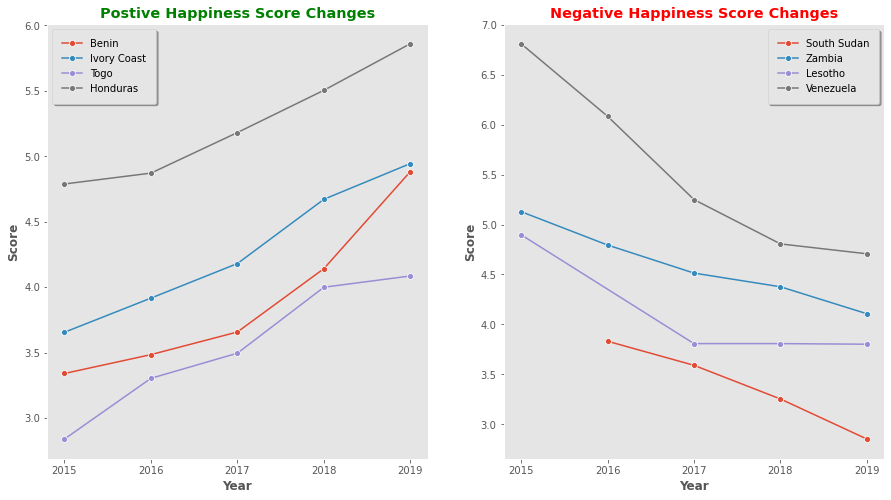

In [107]:
pos_dif_coun = score_diiference.head(n=4).index
neg_dif_coun = score_diiference.tail(n=4).index

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
for pos_con, neg_con in zip(pos_dif_coun, neg_dif_coun):
  sns.lineplot(x=happiness_scores[happiness_scores['Country']==pos_con]['Year'],
               y=happiness_scores[happiness_scores['Country']==pos_con]['Score'], 
               label=pos_con, ax=ax[0], marker='o')
  
  sns.lineplot(x=happiness_scores[happiness_scores['Country']==neg_con]['Year'],
               y=happiness_scores[happiness_scores['Country']==neg_con]['Score'], 
               label=neg_con, ax=ax[1], marker='o')

ax[0].set_title('Postive Happiness Score Changes', fontdict={'fontweight':'bold', 'color':'green'})
ax[1].set_title('Negative Happiness Score Changes', fontdict={'fontweight':'bold', 'color':'red'})

for i in range(2):
  ax[i].xaxis.set_major_locator(MaxNLocator(integer=True))
  ax[i].set_xlabel('Year', fontweight='bold')
  ax[i].set_ylabel('Score', fontweight='bold')
  ax[i].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
  ax[i].grid(False)

plt.show()

In [108]:
"""
def year_wise_data(data):
  columns = ['Score_2015','Score_2016', 'Score_2017', 'Score_2018', 'Score_2019', 'Country']
  updated_data = data[columns]

  new_data=[]
  for index, row in updated_data.iterrows():
    for sub_index in row.index[:-1]:
      b = [sub_index[-4:], row.Country, row[sub_index]]
      new_data.append(b)
  
  final = pd.DataFrame(new_data, columns=['Year', 'Country', 'Score'])
  return final

plot_data = year_wise_data(happiness_changes)

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.lineplot(x='Year', y='Score', hue='Country', data=plot_data, 
             marker='o', ax=ax)

ax.set_title('Changes of Scores over years')
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Happy Score', fontweight='bold')
plt.show()
"""
print()

## Transformation of Features

In [109]:
columns = ['GDP',	'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity']
yearwise_mean = happiness.groupby(by=['Year'])[columns].mean()
yearwise_mean

,GDP,Family,Life Expectancy,Freedom,Trust,Generosity
Year,,,,,,
2015.0,0.850105,0.995408,0.632529,0.431084,0.143999,0.238473
2016.0,0.960179,0.796444,0.561194,0.373322,0.138134,0.244154
2017.0,0.985634,1.192502,0.552909,0.411538,0.123877,0.247966
2018.0,0.896083,1.216223,0.599364,0.456838,0.113158,0.182827
2019.0,0.910878,1.212396,0.727875,0.394382,0.111314,0.185710


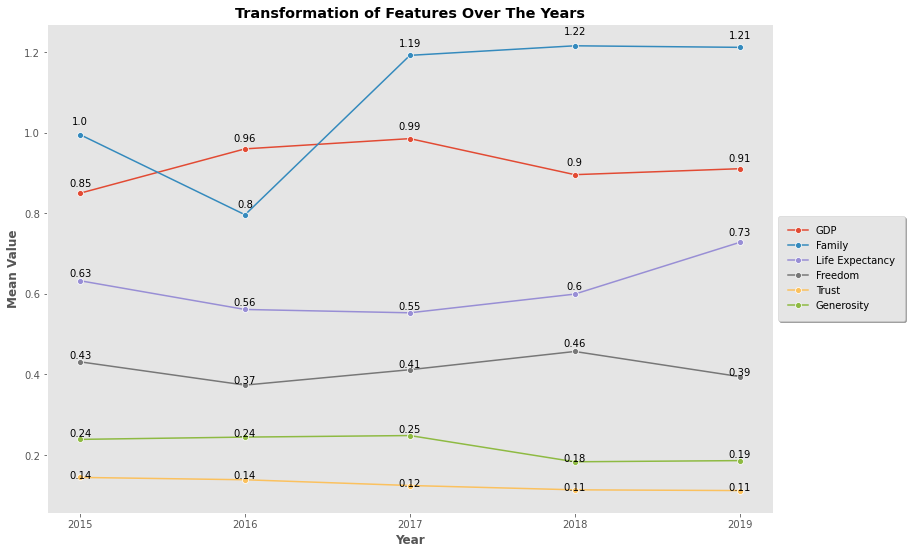

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(13, 9))
for column in columns:
  plot = sns.lineplot(x=yearwise_mean.index, y=yearwise_mean[column], ax=ax, 
               label=column, marker='o')
  
  for index, value in yearwise_mean[column].iteritems():
    plot.text(x=index, y=round(value, 2)*1.02, s=round(value, 2), 
              ha='center', color='black')

ax.set_title('Transformation of Features Over The Years', fontweight='bold')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Mean Value', fontweight='bold')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, 
          loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(False)
plt.show()

Over the time all the above features have changed. 'GDP' increased for the first few years which shows economic growth but in 2018 there is a recession from which the world made recovery in the next year. 'Family' feature didn't have a nice start and showed a decline by 0.197 in the very first year. But it made a huge recovery in 2017 by 0.395 and showed positive movement till the end. Feature 'Life Expectancy' declined in the first few years but made immense recovery in two years only. That may be possible because of improvement in medical care, education, lifestyle and many more. 'Freedom' feature had many ups and downs. It first shows decline and then incline and then again decline. Change in feature 'Trust' tells us that it needs priority because it is continuously declining. Feature 'Generosity' shows a very similar pattern to GDP as it increased for the first few years, then declined for a year and then showed a small rise.

# Conclusion

There are many factor that affects happiness of citizens of a country. In the data we had, with the given features we could assume that mainly GDP, Family support and Life expectancy affects happiness of a country. In addition to that Trust scores of the happy countries is correlated with the happiness scores. These findings made us think of one simple explaination. 

Our explanation for that is simple : **Maslow's Hierarchy of Needs**

![image](https://www.simplypsychology.org/maslow-needs2.webp)

[Image Credit](https://www.simplypsychology.org/maslow.html)

According to Maslow's hierarchy, If you can find yourself food, water, safe place to sleep , protect yourself from any kind of harms , you can start to think about others. These 'others' are firstly your loved ones - family, significant other, children etc. If you think you provided safety, love and other things for your primary chain you can think about Self-fulfillment needs.  
At this point, an individual now thinks about self-actualiziation. We, humans, do this by many different ways, and generosity is one of the ways of people's self-actualiziation. 

For unhappy countries, these counties are from Africa, Middle East. They are dealing with poverty, hunger, safety issues if not dealing with United State's democracy services. So, it is thought that people in these countries have no opportunity to think about other but themselves and family. 